In [2]:
#!pip install PyQt5

  Using cached PyQt5-5.15.6-cp36-abi3-win_amd64.whl (6.7 MB)
  Using cached PyQt5_sip-12.10.1-cp39-cp39-win_amd64.whl (77 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)


In [1]:
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
from keras.models import load_model
from matplotlib import pyplot
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import load_img
import numpy as np
from datetime import datetime

In [2]:
def load_image(filename, size=(256,256)):
    # load image with the preferred size
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = np.expand_dims(pixels, 0)
    return pixels

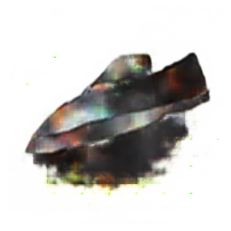

PRINTED


In [ ]:
class Window(QMainWindow):
    def __init__(self):
        super().__init__()

        # setting title
        self.setWindowTitle("Sketch Paint")

        # setting geometry to main window
        self.setGeometry(500, 200, 256, 256)

        # creating image object
        self.image = QImage(self.size(), QImage.Format_RGB32)
        

        # making image color to white
        self.image.fill(Qt.white)
        # variables
        # drawing flag
        self.drawing = False
        # default brush size
        self.brushSize = 1
        # default color
        self.brushColor = Qt.black

        # QPoint object to tract the point
        self.lastPoint = QPoint()
        self.x = None
        self.y = None
        self.shoeModel = load_model('Shoes_Checkpoints/model_ck_0036000.h5')
        #self.loadModel()
        
        self.chosenModel = None
        # creating menu bar
        mainMenu = self.menuBar()

        # creating file menu for save and clear action
        fileMenu = mainMenu.addMenu("File")
        
        generator = QAction("Generator", self)
        fileMenu.addAction(generator)
        generator.triggered.connect(self.Generate)
        # adding brush color to ain menu
        b_color = mainMenu.addMenu("Brush Color")

        # creating save action
        saveAction = QAction("Save", self)
        # adding short cut for save action
        saveAction.setShortcut("Ctrl + S")
        # adding save to the file menu
        fileMenu.addAction(saveAction)
        # adding action to the save
        saveAction.triggered.connect(self.save)

        # creating clear action
        clearAction = QAction("Clear", self)

        # adding clear to the file menu
        fileMenu.addAction(clearAction)
        # adding action to the clear
        clearAction.triggered.connect(self.clear)



        # creating options for brush color
        # creating action for black color
        black = QAction("Black", self)
        # adding this action to the brush colors
        b_color.addAction(black)
        # adding methods to the black
        black.triggered.connect(self.blackColor)
        
        eraser = QAction("Eraser", self)
        b_color.addAction(eraser)
        eraser.triggered.connect(self.Eraser)
    

    # method for checking mouse cicks
    def mousePressEvent(self, event):
        # if left mouse button is pressed
        if event.button() == Qt.LeftButton:
            # make drawing flag true
            self.drawing = True
            # make last point to the point of cursor
            self.lastPoint = event.pos()
            self.x = event.x()
            self.y = event.y()
            

    # method for tracking mouse activity
    def mouseMoveEvent(self, event):
        # checking if left button is pressed and drawing flag is true
        if (event.buttons() & Qt.LeftButton) & self.drawing:
            # creating painter object
            painter = QPainter(self.image)    
            # set the pen of the painter
            painter.setPen(QPen(self.brushColor, self.brushSize, 
                                Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin))            
            painter.drawLine(self.lastPoint, event.pos())            
            # change the last point
            self.lastPoint = event.pos()
            # update
            self.update()


    # method for mouse left button release
    def mouseReleaseEvent(self, event):

        if event.button() == Qt.LeftButton:# & event.x() <= 256:
            # make drawing flag false
            self.drawing = False
            
    # paint event
    def paintEvent(self, event):
        # create a canvas
        canvasPainter = QPainter(self)
        # draw rectangle on the canvas
        canvasPainter.drawImage(self.rect(), self.image, self.image.rect())
        canvasPainter.setPen(QPen(QColor(0, 0, 0), 2))
        canvasPainter.drawLine(256, 0, 256, 256)

    # Saving image without generating
    def save(self):
        filePath, _ = QFileDialog.getSaveFileName(self, "Save Image", "", "JPEG(*.jpg) ")

        if filePath == "":
            return
        self.image.save(filePath)

    # Clearing canvas
    def clear(self):
        # make the whole canvas white
        self.image.fill(Qt.white)
        # update
        self.update()

    # Message Dialog Confirming that generator model is loaded
    def loadModel(self):
        msg = QMessageBox()
        msg.setWindowTitle("Loading Generator")
        msg.setText("Generators Loaded...")
        msg.setIcon(QMessageBox.Information)
        x = msg.exec_()
        
        
    def Generate(self):
        # Saving recent drawn image in current directory with the current time 
        now = datetime.now()
        current_time = now.strftime("%H_%M_%S")
        saved_img = 'img'+current_time+'.jpg'
        self.image.save(saved_img)
        src_image = load_image(saved_img)
        
        # Passing the image to the generator model
        gen_image = self.shoeModel.predict(src_image)
        gen_image = (gen_image + 1) / 2.0
        # Printing generated image
        
        
        f = pyplot.figure()
        f.add_subplot(1,1, 1)
        pyplot.imshow(gen_image[0])
        pyplot.axis('off')
        pyplot.show(block=True)
        #print("PRINTED")
        array_to_img(gen_image[0]).show()

    
    # Changing brush
    def blackColor(self):
        self.brushColor = Qt.black
        self.brushSize = 1
    def Eraser(self):
        self.brushColor = Qt.white
        self.brushSize = 10



# create pyqt5 app
App = QApplication(sys.argv)

# create the instance of our Window
window = Window()

# showing the window
window.show()

# start the app
sys.exit(App.exec())


In [10]:
#from platform import python_version

#print(python_version())

3.9.12


In [2]:
#!pip uninstall PyQT5

^C


In [7]:
#!pip uninstall -y pyqt5-sip

Found existing installation: PyQt5-sip 12.10.1
Uninstalling PyQt5-sip-12.10.1:
  Successfully uninstalled PyQt5-sip-12.10.1
